# **Ch09 데이터 분석 프로젝트**
#### **- 한국인의 삶을 파악하라!**

### **09-1 '한국복지패널 데이터' 분석 준비하기**

#### **데이터 분석 준비하기**

#### 1. 데이터 분석 환경 준비하기

In [1]:
# 그래프 해상도 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})
%config InlineBackend.figure_format = 'retina'  #Jupyter 환경 정의: 그래프나 그림의 출력 품질을 설정

#### 2. 패키지 설치 및 로드하기

#### Anaconda Prompt에서 install
###### SPSS, SAS, STATA 등 다른 툴에서 사용하는 통계 파일을 불러올 수 있음.
pip install pyreadstat  

#### 3. 데이터 불러오기
##### Koweps_hpwc14_2019_beta2.sav 파일을 워킹 디렉터리에 삽입
###### > 2020년 발간 복지패널 데이터. 6,331가구, 14,418명의 정보를 담고 있음
###### > *.sav: 통계 분석 소프트웨어 SPSS 전용 파일

In [3]:
# 데이터 불러오기
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기 
welfare = raw_welfare.copy()
welfare 

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


#### **[실습-1] 한국복지패널 제공 관련 CodeBook 파일 로딩**
##### > 'Koweps_Codebook_2019.xlsx' 파일을 읽어들여서 데이터 프레임 구성 후 출력
##### > Koweps_hpwc14_2019_beta2.sav 파일의 변수들에 대한 데이터 구성 내용을 설명하고 있음

In [4]:
## [Data Frame] Excel 파일 Reading: 한국복지패널 제공 관련 CodeBook 파일



,변수명,설명,내용,범위,모름/무응답,출처 조사설계서
0,h14_g3,성별,1.남 2.여,N(1~2),모름/무응답=9,14차 머지데이터_변수명.xlsx\n(2019년 14차 한국복지패널조사) 조사설계서...
1,h14_g4,태어난 연도,년,N(1900~2014),모름/무응답=9999,14차 머지데이터_변수명.xlsx\n(2019년 14차 한국복지패널조사) 조사설계서...
2,h14_g10,혼인상태,0.비해당(18세 미만)\n1.유배우 2.사별 3.이혼...,N(0~6),모름/무응답=9,14차 머지데이터_변수명.xlsx\n(2019년 14차 한국복지패널조사) 조사설계서...
3,h14_g11,종교,1.있음 2.없음,N(1~2),모름/무응답=9,14차 머지데이터_변수명.xlsx\n(2019년 14차 한국복지패널조사) 조사설계서...
4,p1402_8aq1,일한달의 월 평균 임금,만원,N(1~9998),모름/무응답=9999,(2019년 14차 한국복지패널조사) 조사설계서-가구원용(beta2).xlsx
5,h14_eco9,직종,직종 코드표 참조,N(직종코드 시트참조),모름/무응답=9999,14차 머지데이터_변수명.xlsx\n(2019년 14차 한국복지패널조사) 조사설계서...
6,h14_reg7,7개 권역별 지역구분,1. 서울 2. 수도권(인천/경기) 3. 부산/경남/울산 ...,N(1~7),NaN,(2019년 14차 한국복지패널조사) 조사설계서-가구용(beta2).xlsx


#### **[실습-2] 필요한 컬럼만으로 데이터 프레임 구성**
##### 변수명 바꾸기
###### > {'h14_g3' : 'sex', 'h14_g4' : 'birth', 'h14_g10' : 'marriage_type',  'h14_g11' : 'religion', 'p1402_8aq1' : 'income', 'h14_eco9' : code_job', 'h14_reg7' : 'code_region'}
##### 이름이 바뀐 변수 만으로 newwel 데이터 프레임 구성

In [5]:
## 변수명 바꾸기



,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [6]:
## 바꾼 변수명으로만 데이터 프레임 구성



,sex,birth,marriage_type,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0


#### **[실습-3] 성(sex)별 인원 수 비율 분석하기**
###### > 새로 열 추출 생성한 데이터 프레임 사용
##### 0. 'sex'열의  숫자 성별 값을 의미있는 문자 값으로 변경
###### >> {1 : 'male', 2 : 'female'}으로 변경
##### 1. 성별 인원 수 데이터 프레임 구성 
##### 2, 파이 그래프로 표현하기
###### >> 성별 인원 수 비율
###### >> 그래프의 시작을 상단으로 조정

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23624\841750372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newwel['sex'] = np.where(newwel['sex'] == 1, 'male', 'female')


([<matplotlib.patches.Wedge at 0x278918f2850>,
 [Text(-1.0870834818683026, -0.1680758859833504, 'female'),
  Text(1.087083497604698, 0.1680757842032485, 'male')],
 [Text(-0.5929546264736195, -0.09167775599091839, '54.88%'),
  Text(0.5929546350571079, 0.09167770047449918, '45.12%')])

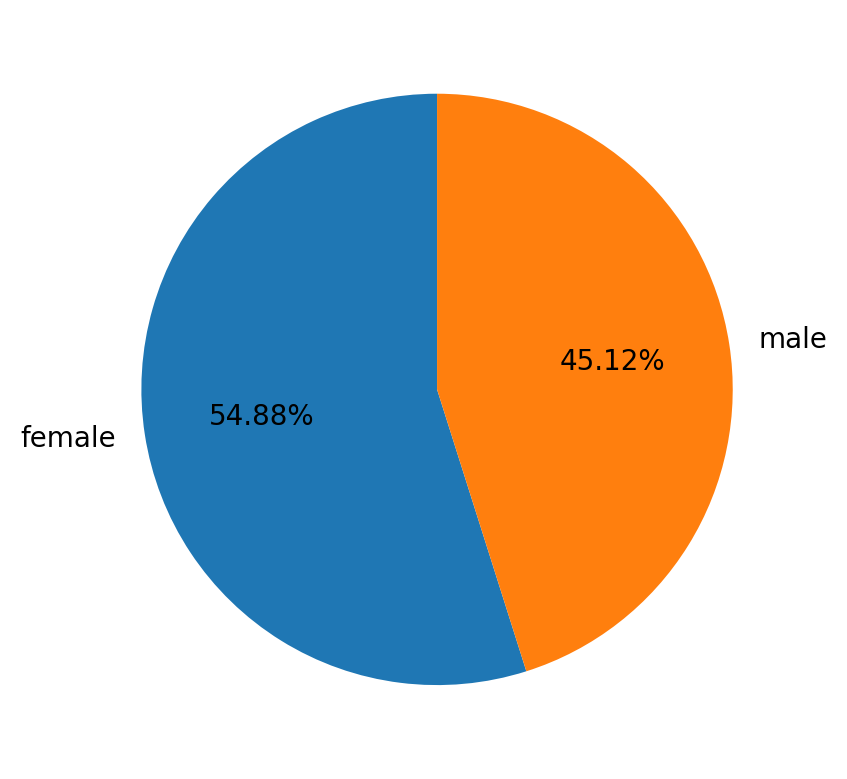

In [7]:
# 성별 항목 이름 부여



## 성병 빈도수 열 만들기



#### 파이그래프 그리기 : 'sex'별 빈도수에 대한 비율



#### **[실습-4] 연령대별 인원 수 비율 분석하기**
##### : 새로 열 추출 생성한 newwel 데이터 프레임 사용
##### 0. 'age' 변수 추가
###### > 나이는 2019년도를 기준으로 'birth'로 환산하여 구함
##### 1. 연령대 파생변수 'age10' 추가
###### >> '00' : 0-9, '10' : 10-19, '20' : 10-29, '30' : 30-39, '40' : 40-49,
###### >> '50' : 50-59,'60' : 60-69, '70' : 70-79, '80' : 80-89, '90' : 90-99, '100' : 100-
##### 2. 연령대별 평균 임금 데이터 프레임 구성 
###### >> 'age10' 기준 연령대별 인원 수 데이터 프레임 구성
##### 3. 파이 그래프로 표현하기
###### >> 연령대별 인원 수 비율 파이 그래프 그리기

([<matplotlib.patches.Wedge at 0x27893a70e80>,
 [Text(1.0854998125739637, 0.1780172938281284, '00'),
  Text(0.8921113050466446, 0.6435350957080528, '10'),
  Text(0.6610964987653354, 0.8791765575356381, '100'),
  Text(0.3701345051584889, 1.0358573492962633, '20'),
  Text(-0.24690900358045392, 1.0719309417825889, '30'),
  Text(-0.8678143369759413, 0.675942509788375, '40'),
  Text(-1.087591117552792, -0.16475909996194268, '50'),
  Text(-0.6410054437457209, -0.8939306578747321, '60'),
  Text(0.27322461798300507, -1.0655272441979329, '70'),
  Text(0.9826730137468299, -0.49432150272239117, '80'),
  Text(1.098986749652936, -0.047203009303173823, '90')],
 [Text(0.5920908068585256, 0.09710034208807002, '5.17%'),
  Text(0.48660616638907883, 0.3510191431134833, '9.54%'),
  Text(0.36059809023563744, 0.4795508495648934, '0.04%'),
  Text(0.20189154826826664, 0.5650130996161435, '9.56%'),
  Text(-0.13467763831661123, 0.5846896046086847, '8.57%'),
  Text(-0.4733532747141498, 0.3686959144300227, '13.16

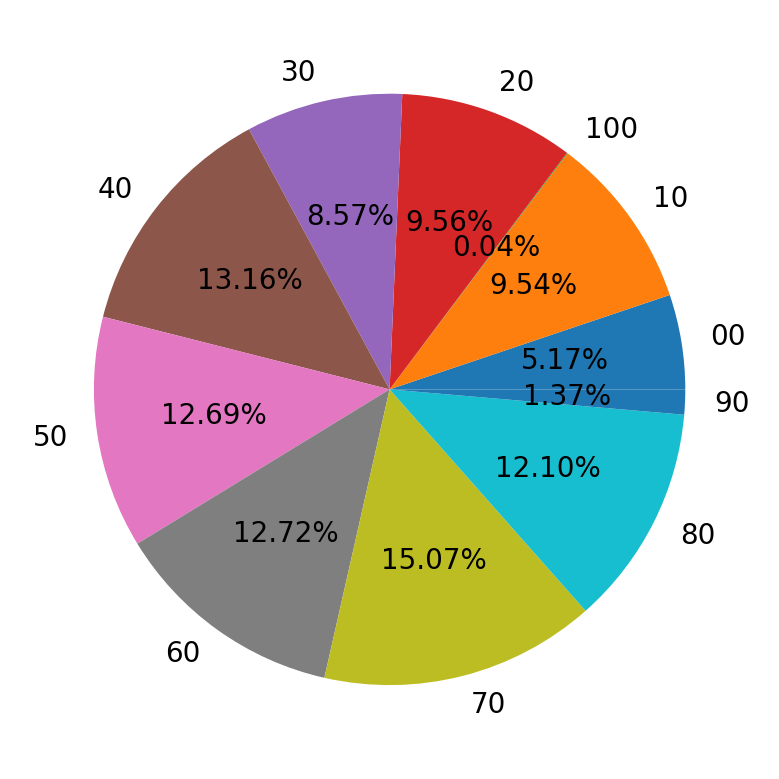

In [8]:
## 0. 나이 변수 'age' 반들기



## >> 연령대 파생변수 'age10' 추가



## 1. age10 별  빈도 수 구하기



## 2. 파이그래프 그리기 : 'age10'별 빈도수 비율 파이그래프



#### **[실습-5] 연령별 수입의 산점도 그래프 그리기**
###### : 새로 열 추출 생성한 newwel 데이터 프레임 사용
##### > 성별('sex')로 색조(hue)를 다르게 표현

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='age', ylabel='income'>

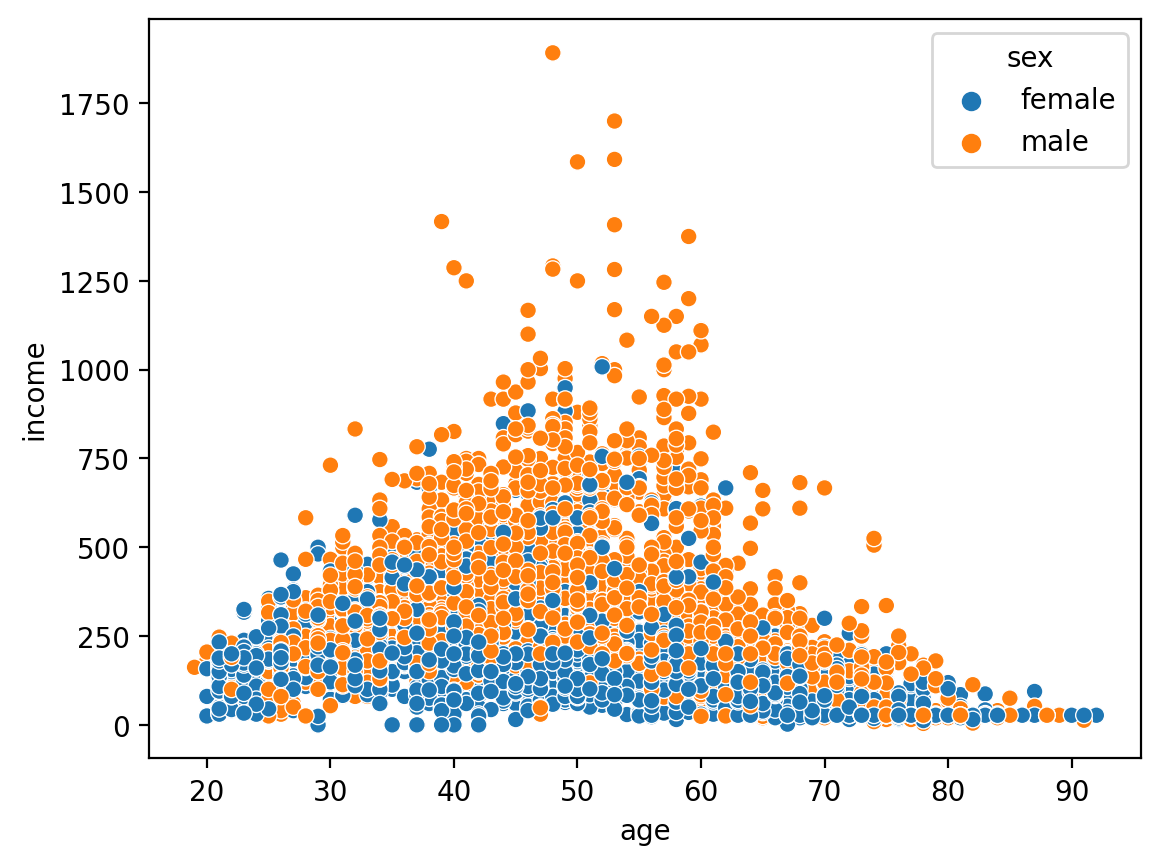

In [9]:
#### 'age' 연령별 income의 산점도 그래프 그리기
#### > 색조(hue)는 'sex'로 구분



#### **[실습-6] 지역별 임금 비교 분석하기**
###### **: 새로 열 추출 생성한 newwel 데이터 프레임 사용**
##### 0. newwel 데이터 프레임 조정
###### > newwel에 병합으로 지역명 변수 추가
###### > 연령대 변수 'ageg' 만들기
##### 1. 지역 및 연령대별 월급 평균 데이터 프레임 만들기
###### > 'income' 결측치 제거, index 생략
###### > 'reg_ageg_income' 이름으로 데이터 프레임 생성
##### 2. 지역별 월급 평균 데이터 프레임 만들기
###### > 'income' 결측치 제거, index 생략
###### > 'reg_income' 이름으로 데이터 프레임 생성
##### 3. 두 데이터 프레임을 하나로 병합
###### > 'reg_ageg_income'를 기준으로 결합
##### 4. 막대 그래프로 표현하기
###### > 지역별 평균 월급이 큰 지역부터 표현되도록 데이터 프레임 재구성
###### > 'region'이 y-축이 되도록 그래프로 표현

In [10]:
## newwel에 병합으로 지역명 변수 추가
# 지역 코드 목록 만들기



# 병합으로 지역명 변수 추가



,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [11]:
## 연령대 변수 'ageg' 만들기



,sex,birth,marriage_type,religion,income,code_job,code_region,age,age10,region,ageg
0,female,1945.0,2.0,1.0,NaN,NaN,1.0,75.0,70,서울,old
1,male,1948.0,2.0,2.0,NaN,NaN,1.0,72.0,70,서울,old
2,male,1942.0,3.0,1.0,107.0,762.0,1.0,78.0,70,서울,old
3,male,1962.0,1.0,1.0,192.0,855.0,1.0,58.0,50,서울,middle
4,female,1963.0,1.0,1.0,NaN,NaN,1.0,57.0,50,서울,middle
...,...,...,...,...,...,...,...,...,...,...,...
14413,female,1967.0,1.0,1.0,NaN,NaN,5.0,53.0,50,대전/충남,middle
14414,female,1992.0,5.0,1.0,NaN,NaN,5.0,28.0,20,대전/충남,young
14415,male,1995.0,5.0,1.0,NaN,910.0,5.0,25.0,20,대전/충남,young
14416,female,1998.0,5.0,1.0,200.0,246.0,5.0,22.0,20,대전/충남,young


In [12]:
#### 1. 지역 및 연령대별 월급 평균 데이터 프레임 만들기
##### > 'income' 결측치 제거, index 생략
##### > 'reg_ageg_income' 이름으로 데이터 프레임 생성



,region,ageg,mean_income
0,강원/충북,middle,322.644231
1,강원/충북,old,115.489796
2,강원/충북,young,197.000000
3,광주/전남/전북/제주도,middle,301.080000
4,광주/전남/전북/제주도,old,99.080925


In [13]:
#### 2. 지역별 월급 평균 데이터 프레임 만들기
##### > 'income' 결측치 제거, index 생략
##### > 'reg_income' 이름으로 데이터 프레임 생성



,region,mean_region
0,강원/충북,251.492492
1,광주/전남/전북/제주도,238.434389
2,대구/경북,247.462069
3,대전/충남,299.073892
4,부산/경남/울산,270.336066


In [14]:
#### 3. 두 데이터 프레임을 하나로 병합
##### > 'reg_ageg_income'를 기준으로 결합



,region,ageg,mean_income,mean_region
0,강원/충북,middle,322.644231,251.492492
1,강원/충북,old,115.489796,251.492492
2,강원/충북,young,197.000000,251.492492
3,광주/전남/전북/제주도,middle,301.080000,238.434389
4,광주/전남/전북/제주도,old,99.080925,238.434389


In [15]:
## 맑은 고딕 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='mean_income', ylabel='region'>

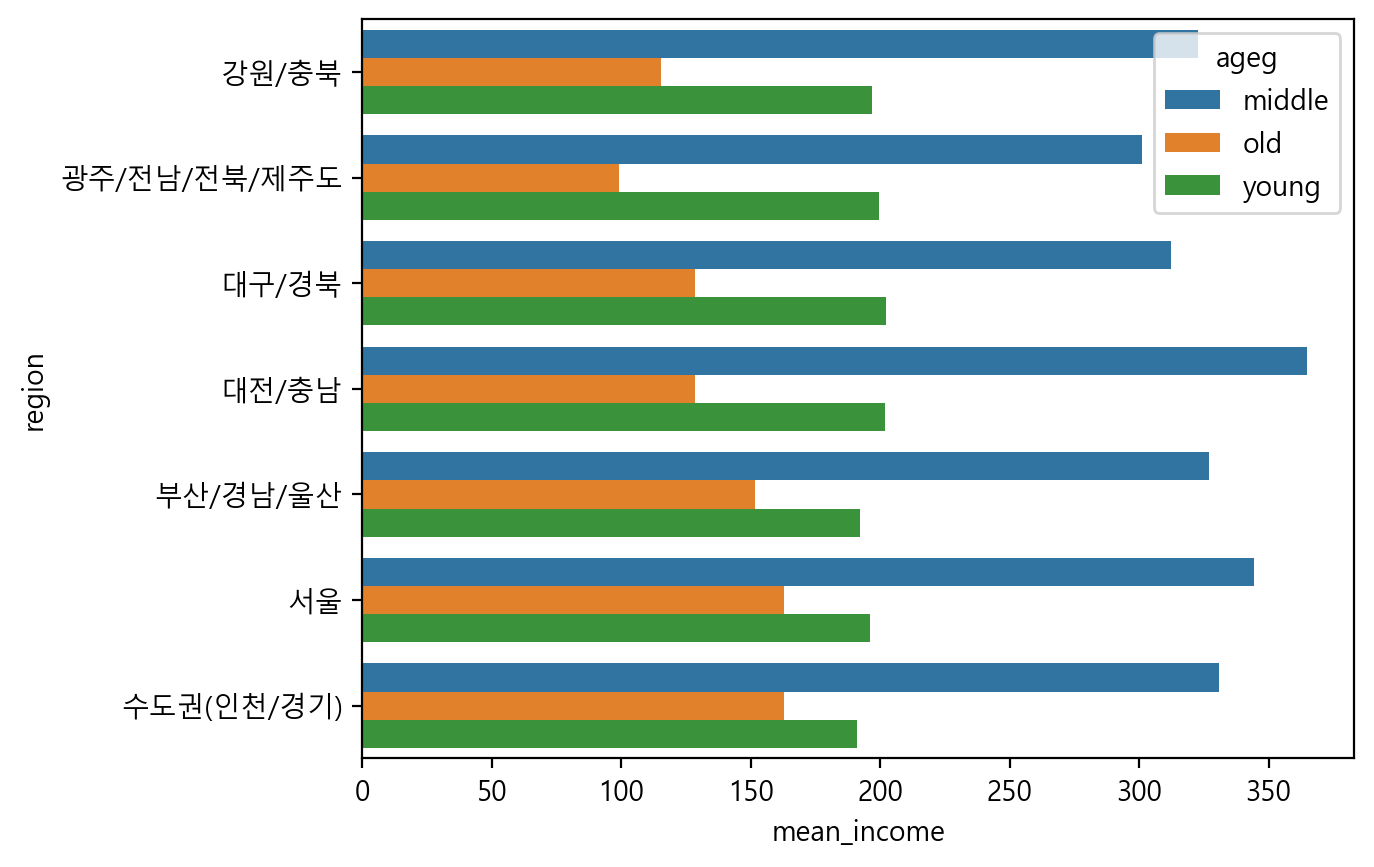

In [16]:
#### 4. 막대 그래프로 표현하기



In [17]:
#### 4. 막대 그래프로 표현하기
##### > 평균 월급이 큰 지역부터 표현
# 노년층 비율 기준 정렬, 변수 순서 바꾸기



,region,ageg,mean_income,mean_region
11,대전/충남,young,202.066667,299.073892
10,대전/충남,old,128.378049,299.073892
9,대전/충남,middle,364.888889,299.073892
17,서울,young,195.891892,282.818299
16,서울,old,162.755814,282.818299
15,서울,middle,344.277890,282.818299
20,수도권(인천/경기),young,191.255172,276.638352
19,수도권(인천/경기),old,162.961977,276.638352
18,수도권(인천/경기),middle,330.770807,276.638352
14,부산/경남/울산,young,192.269231,270.336066


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='mean_income', ylabel='region'>

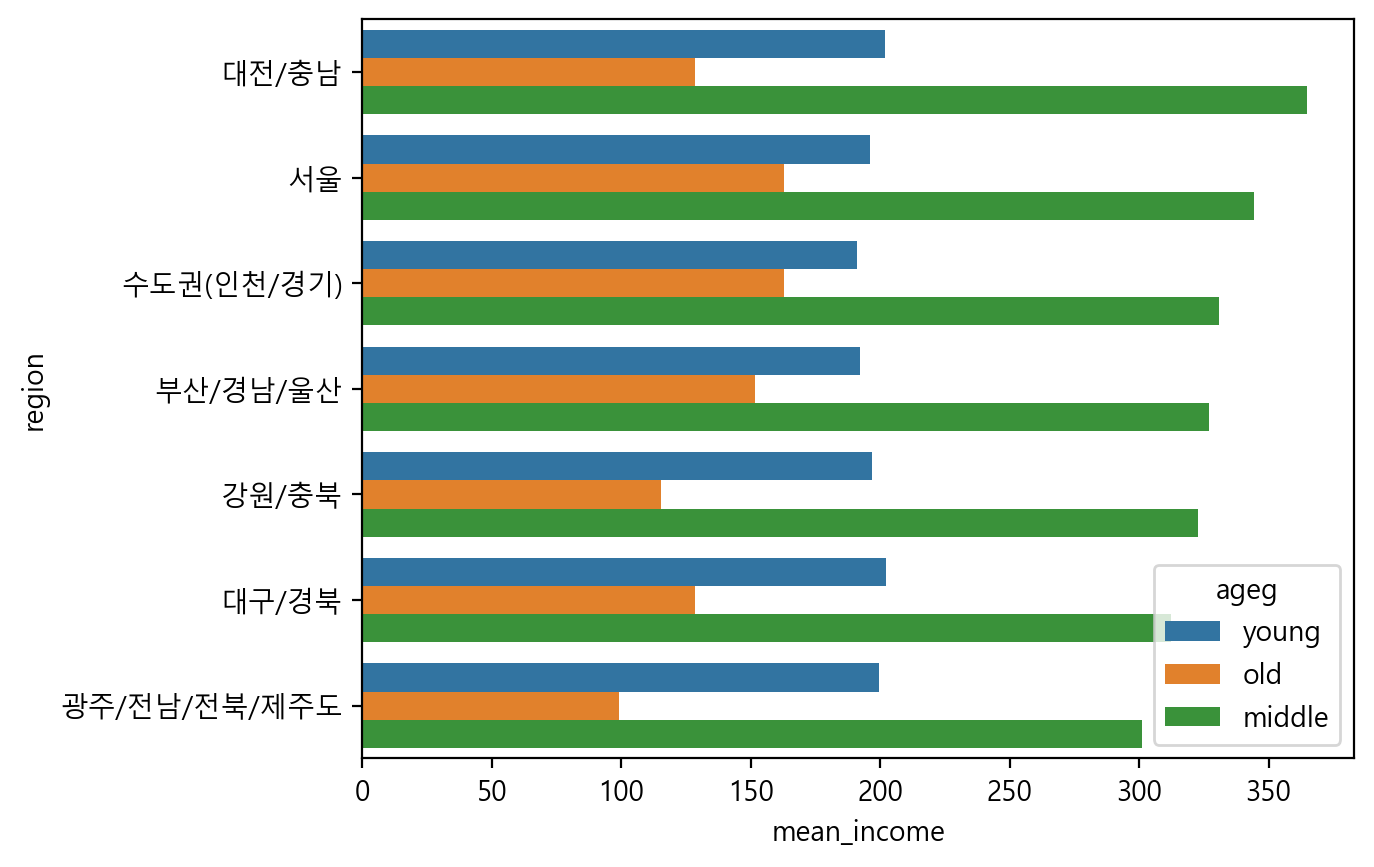

In [18]:
#### 4. 막대 그래프로 표현하기
##### > 'region'이 y-축이 되도록 그래프로 표현# 막대 그래프 만들기



#### **실습-7 히트맵 그림 - 상관 관계 정도 표현하기**
##### **: 새로 열 추출 생성한 newwel 데이터 프레임 사용**
##### 0. 성별(sex) 문자 값을 숫자 값으로 원래대로 변경
##### > 'male' : 1, 'female' : 2
##### 1. 상관행렬용 데이터 추출
##### > ['sex', 'marriage_type', 'religion', 'income', 'code_job', 'code_region', 'age'] 만 추출
##### 2. 상관행렬 만들기
##### 3. 히트맵 그리기

In [19]:
# 성별 항목 이름 변경



,sex,birth,marriage_type,religion,income,code_job,code_region,age,age10,region,ageg
0,2,1945.0,2.0,1.0,NaN,NaN,1.0,75.0,70,서울,old
1,1,1948.0,2.0,2.0,NaN,NaN,1.0,72.0,70,서울,old
2,1,1942.0,3.0,1.0,107.0,762.0,1.0,78.0,70,서울,old
3,1,1962.0,1.0,1.0,192.0,855.0,1.0,58.0,50,서울,middle
4,2,1963.0,1.0,1.0,NaN,NaN,1.0,57.0,50,서울,middle
...,...,...,...,...,...,...,...,...,...,...,...
14413,2,1967.0,1.0,1.0,NaN,NaN,5.0,53.0,50,대전/충남,middle
14414,2,1992.0,5.0,1.0,NaN,NaN,5.0,28.0,20,대전/충남,young
14415,1,1995.0,5.0,1.0,NaN,910.0,5.0,25.0,20,대전/충남,young
14416,2,1998.0,5.0,1.0,200.0,246.0,5.0,22.0,20,대전/충남,young


In [21]:
#### 1. 상관행렬용 데이터 추출



,sex,marriage_type,religion,income,code_job,code_region,age
0,2,2.0,1.0,NaN,NaN,1.0,75.0
1,1,2.0,2.0,NaN,NaN,1.0,72.0
2,1,3.0,1.0,107.0,762.0,1.0,78.0
3,1,1.0,1.0,192.0,855.0,1.0,58.0
4,2,1.0,1.0,NaN,NaN,1.0,57.0
...,...,...,...,...,...,...,...
14413,2,1.0,1.0,NaN,NaN,5.0,53.0
14414,2,5.0,1.0,NaN,NaN,5.0,28.0
14415,1,5.0,1.0,NaN,910.0,5.0,25.0
14416,2,5.0,1.0,200.0,246.0,5.0,22.0


In [22]:
#### 2. 상관행렬 만들기



,sex,marriage_type,religion,income,code_job,code_region,age
sex,1.00,-0.00,-0.10,-0.41,-0.08,0.01,0.09
marriage_type,-0.00,1.00,0.04,-0.16,-0.10,-0.03,-0.04
religion,-0.10,0.04,1.00,0.09,-0.04,0.07,-0.18
income,-0.41,-0.16,0.09,1.00,-0.35,-0.06,-0.22
code_job,-0.08,-0.10,-0.04,-0.35,1.00,0.07,0.35
code_region,0.01,-0.03,0.07,-0.06,0.07,1.00,0.07
age,0.09,-0.04,-0.18,-0.22,0.35,0.07,1.00


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


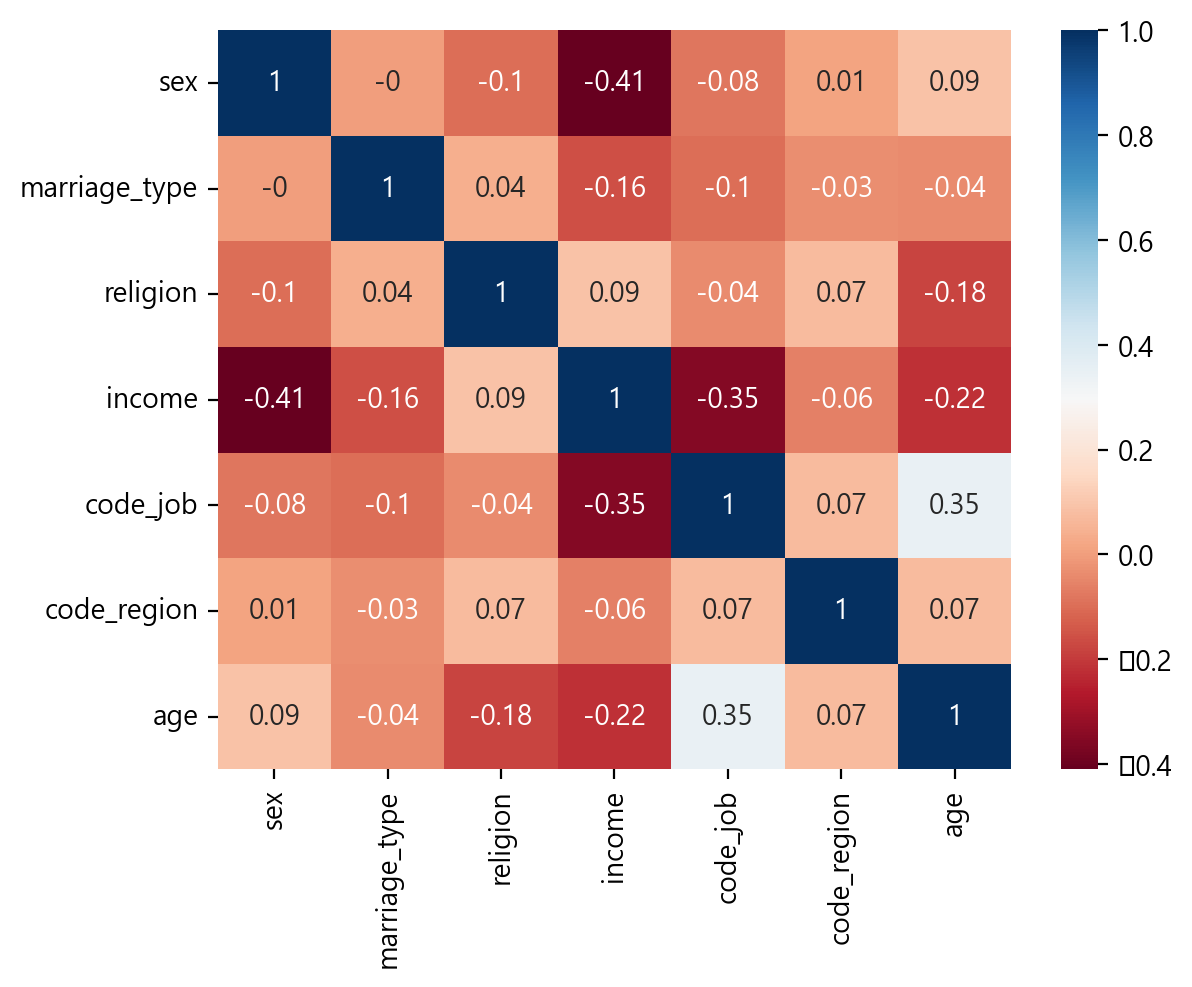

In [23]:
#### 3. 히트맵 그리기

